In [1]:
import pandas as pd

In [2]:
employees = pd.read_excel('employees.xls')

In [3]:
print(employees.shape)

(107, 11)


In [4]:
print(employees.columns)

Index(['EMPLOYEE_ID', 'FIRST_NAME', 'LAST_NAME', 'EMAIL', 'PHONE_NUMBER',
       'HIRE_DATE', 'JOB_ID', 'SALARY', 'COMMISSION_PCT', 'MANAGER_ID',
       'DEPARTMENT_ID'],
      dtype='object')


In [5]:
print(employees.head())

   EMPLOYEE_ID FIRST_NAME LAST_NAME     EMAIL  PHONE_NUMBER  \
0          100     Steven      King     SKING  515.123.4567   
1          101      Neena   Kochhar  NKOCHHAR  515.123.4568   
2          102        Lex   De Haan   LDEHAAN  515.123.4569   
3          103  Alexander    Hunold   AHUNOLD  590.423.4567   
4          104      Bruce     Ernst    BERNST  590.423.4568   

             HIRE_DATE   JOB_ID  SALARY  COMMISSION_PCT  MANAGER_ID  \
0  2003-06-17 00:00:00  AD_PRES   24000             NaN         NaN   
1  2005-09-21 00:00:00    AD_VP   17000             NaN       100.0   
2  2001-01-13 00:00:00    AD_VP   17000             NaN       100.0   
3  2006-01-03 00:00:00  IT_PROG    9000             NaN       102.0   
4  2007-05-21 00:00:00  IT_PROG    6000             NaN       103.0   

   DEPARTMENT_ID  
0           90.0  
1           90.0  
2           90.0  
3           60.0  
4           60.0  


In [6]:
departments = pd.read_excel('departments.xls')

In [7]:
print(departments)

    DEPARTMENT_ID       DEPARTMENT_NAME  MANAGER_ID  LOCATION_ID
0              10        Administration       200.0         1700
1              20             Marketing       201.0         1800
2              30            Purchasing       114.0         1700
3              40       Human Resources       203.0         2400
4              50              Shipping       121.0         1500
5              60                    IT       103.0         1400
6              70      Public Relations       204.0         2700
7              80                 Sales       145.0         2500
8              90             Executive       100.0         1700
9             100               Finance       108.0         1700
10            110            Accounting       205.0         1700
11            120              Treasury         NaN         1700
12            130         Corporate Tax         NaN         1700
13            140    Control And Credit         NaN         1700
14            150  Shareh

In [11]:
# trong dataframe employees hay tao cot DEPARTMENT_NAME va gan du lieu cho dung
emp_dep = pd.merge(employees, departments[['DEPARTMENT_ID','DEPARTMENT_NAME']], on='DEPARTMENT_ID')

In [12]:
print(emp_dep)

     EMPLOYEE_ID   FIRST_NAME    LAST_NAME     EMAIL        PHONE_NUMBER  \
0            100       Steven         King     SKING        515.123.4567   
1            101        Neena      Kochhar  NKOCHHAR        515.123.4568   
2            102          Lex      De Haan   LDEHAAN        515.123.4569   
3            103    Alexander       Hunold   AHUNOLD        590.423.4567   
4            104        Bruce        Ernst    BERNST        590.423.4568   
5            105        David       Austin   DAUSTIN        590.423.4569   
6            106        Valli    Pataballa  VPATABAL        590.423.4560   
7            107        Diana      Lorentz  DLORENTZ        590.423.5567   
8            108        Nancy    Greenberg  NGREENBE        515.124.4569   
9            109       Daniel       Faviet   DFAVIET        515.124.4169   
10           110         John         Chen     JCHEN        515.124.4269   
11           111       Ismael      Sciarra  ISCIARRA        515.124.4369   
12          

In [13]:
# bar, pie
df_sum_salary = emp_dep.groupby('DEPARTMENT_NAME', as_index=True).SALARY.sum()

In [14]:
print(df_sum_salary)

DEPARTMENT_NAME
Accounting           20308
Administration        4400
Executive            58000
Finance              51608
Human Resources       6500
IT                   28800
Marketing            19000
Public Relations     10000
Purchasing           24900
Sales               304500
Shipping            156400
Name: SALARY, dtype: int64


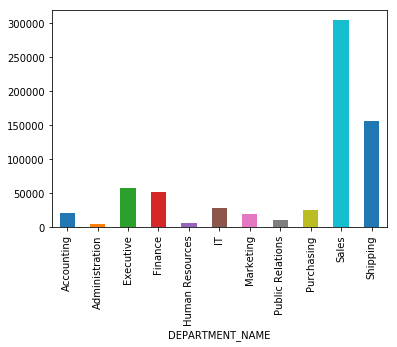

In [16]:
df_sum_salary.plot.bar()

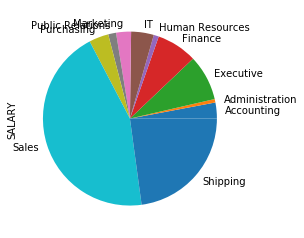

In [17]:
df_sum_salary.plot.pie()

In [20]:
# tinh tong luong va dem so nhan vien theo phong
df_sum_count = emp_dep.groupby('DEPARTMENT_NAME').SALARY.agg(['sum','count'])

In [21]:
print(df_sum_count)

                     sum  count
DEPARTMENT_NAME                
Accounting         20308      2
Administration      4400      1
Executive          58000      3
Finance            51608      6
Human Resources     6500      1
IT                 28800      5
Marketing          19000      2
Public Relations   10000      1
Purchasing         24900      6
Sales             304500     34
Shipping          156400     45


In [23]:
df_sum_count['count'] = df_sum_count['count']*1000

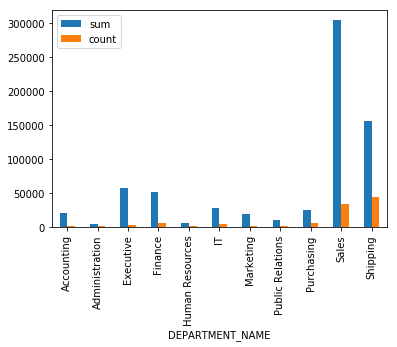

In [24]:
df_sum_count.plot.bar()

In [26]:
# tinh luong max va luong min theo phong
df_max_min = emp_dep.groupby('DEPARTMENT_NAME').SALARY.agg(['max','min'])

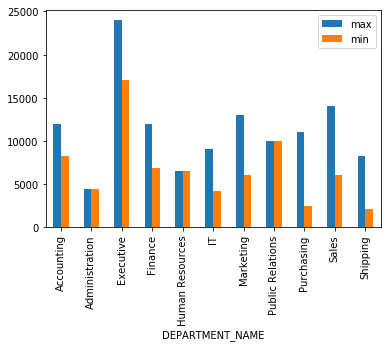

In [27]:
df_max_min.plot.bar()

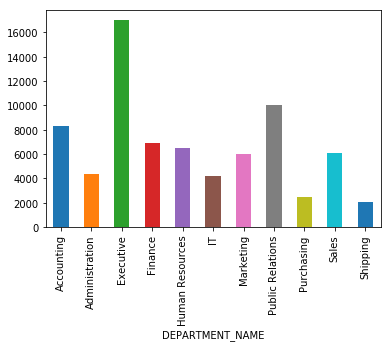

In [28]:
df_max_min['min'].plot.bar()

In [30]:
# tinh nam vao lam
emp_dep['NAM_VAO_LAM'] = pd.DatetimeIndex(emp_dep['HIRE_DATE']).year
print(emp_dep.head())

   EMPLOYEE_ID FIRST_NAME LAST_NAME     EMAIL  PHONE_NUMBER  \
0          100     Steven      King     SKING  515.123.4567   
1          101      Neena   Kochhar  NKOCHHAR  515.123.4568   
2          102        Lex   De Haan   LDEHAAN  515.123.4569   
3          103  Alexander    Hunold   AHUNOLD  590.423.4567   
4          104      Bruce     Ernst    BERNST  590.423.4568   

             HIRE_DATE   JOB_ID  SALARY  COMMISSION_PCT  MANAGER_ID  \
0  2003-06-17 00:00:00  AD_PRES   24000             NaN         NaN   
1  2005-09-21 00:00:00    AD_VP   17000             NaN       100.0   
2  2001-01-13 00:00:00    AD_VP   17000             NaN       100.0   
3  2006-01-03 00:00:00  IT_PROG    9000             NaN       102.0   
4  2007-05-21 00:00:00  IT_PROG    6000             NaN       103.0   

   DEPARTMENT_ID DEPARTMENT_NAME  NAM_VAO_LAM  
0           90.0       Executive         2003  
1           90.0       Executive         2005  
2           90.0       Executive         2001  
3 

In [31]:
# nhom theo nam vao lam va dem so nhan vien
df_count_year = emp_dep.groupby('NAM_VAO_LAM').EMPLOYEE_ID.count()

In [32]:
print(df_count_year)

NAM_VAO_LAM
2001     1
2002     7
2003     6
2004    10
2005    29
2006    24
2007    18
2008    11
Name: EMPLOYEE_ID, dtype: int64


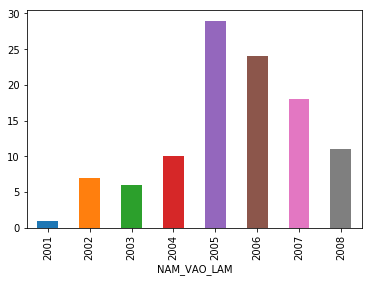

In [33]:
df_count_year.plot.bar()

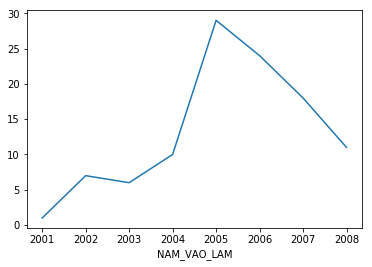

In [34]:
df_count_year.plot()